<h1>CREAZIONE SERIE STORICHE DEI DECESSI PER COVID-19 DELLE NAZIONI EUROPEE

Dati aggionati al: <b>10/12/2020</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('csv/decessi_covid19_eu.csv')
df

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0
1,2020-01-23,Afghanistan,NaN,0,0.0,0
2,2020-01-24,Afghanistan,NaN,0,0.0,0
3,2020-01-25,Afghanistan,NaN,0,0.0,0
4,2020-01-26,Afghanistan,NaN,0,0.0,0
...,...,...,...,...,...,...
87799,2020-12-06,Zimbabwe,NaN,10718,8880.0,291
87800,2020-12-07,Zimbabwe,NaN,10839,8972.0,294
87801,2020-12-08,Zimbabwe,NaN,10912,9062.0,303
87802,2020-12-09,Zimbabwe,NaN,11007,9147.0,304


In [2]:
df.rename(columns={'Country/Region': 'Geo'}, inplace=True)
df.rename(columns={'Deaths': 'Value'}, inplace=True)
df.drop([ 'Confirmed', 'Recovered'], axis=1, inplace=True)
df.head()

,Date,Geo,Province/State,Value
0,2020-01-22,Afghanistan,NaN,0
1,2020-01-23,Afghanistan,NaN,0
2,2020-01-24,Afghanistan,NaN,0
3,2020-01-25,Afghanistan,NaN,0
4,2020-01-26,Afghanistan,NaN,0


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Date'] < '2020-10-01']
df

,Date,Geo,Province/State,Value
0,2020-01-22,Afghanistan,NaN,0
1,2020-01-23,Afghanistan,NaN,0
2,2020-01-24,Afghanistan,NaN,0
3,2020-01-25,Afghanistan,NaN,0
4,2020-01-26,Afghanistan,NaN,0
...,...,...,...,...
87728,2020-09-26,Zimbabwe,NaN,227
87729,2020-09-27,Zimbabwe,NaN,227
87730,2020-09-28,Zimbabwe,NaN,228
87731,2020-09-29,Zimbabwe,NaN,228


In [4]:
#numero di record
index = df.index
record = len(index)
print(record)

68563


In [5]:
import numpy as np
deceduti = df['Value']
print('mean', np.mean(deceduti))
print('min', np.min(deceduti))
print('max', np.max(deceduti))

mean 1428.9918760847688
min 0
max 207199


<h1>FRANCIA

In [6]:
df_fr = df[df['Geo'] == 'France']
df_fr.head()

,Date,Geo,Province/State,Value
38232,2020-01-22,France,French Guiana,0
38233,2020-01-23,France,French Guiana,0
38234,2020-01-24,France,French Guiana,0
38235,2020-01-25,France,French Guiana,0
38236,2020-01-26,France,French Guiana,0


In [7]:
df_fr=df_fr.groupby('Date').sum()
df_fr = df_fr.diff()
df_fr.dropna(inplace=True)
df_fr.head()

,Value
Date,
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
2020-01-27,0.0


In [8]:
df_fr = df_fr.reset_index()
df_fr.head()

,Date,Value
0,2020-01-23,0.0
1,2020-01-24,0.0
2,2020-01-25,0.0
3,2020-01-26,0.0
4,2020-01-27,0.0


<h4>Trasformo la serie storica su base settimanale

In [9]:
#df_fr['Date']= pd.to_datetime(df_fr['Date'])
#df_fr['week']= df_fr['Date'].dt.week
#df_fr['Date'] = df_fr['Date'].astype(str) + 'W' + df_fr['week'].astype(str)
#df_fr.drop(['week'], axis=1, inplace=True)
#df_fr.head()

In [10]:
#df_fr['Date'] = pd.to_datetime(df_fr['Date'] + '1', format='%Y-%m-%dW%W%w')
df_fr['Date'] = pd.to_datetime(df_fr['Date'])
df_fr = df_fr.groupby('Date').sum()
df_fr.head()

,Value
Date,
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
2020-01-27,0.0


In [11]:
print(df_fr.sum())

Value    31986.0
dtype: float64


In [12]:
df_fr = df_fr.reset_index()
df_fr = df_fr[df_fr['Date'] < '2020-10-01']
df_fr.head()

,Date,Value
0,2020-01-23,0.0
1,2020-01-24,0.0
2,2020-01-25,0.0
3,2020-01-26,0.0
4,2020-01-27,0.0


In [13]:
df_fr.to_csv('csv/decessi_covid/serie_storica_decessi_covid_fr.csv')

In [14]:
df_fr = df_fr.set_index('Date')
ts_fr = df_fr.Value
ts_fr.head()

Date
2020-01-23    0.0
2020-01-24    0.0
2020-01-25    0.0
2020-01-26    0.0
2020-01-27    0.0
Name: Value, dtype: float64

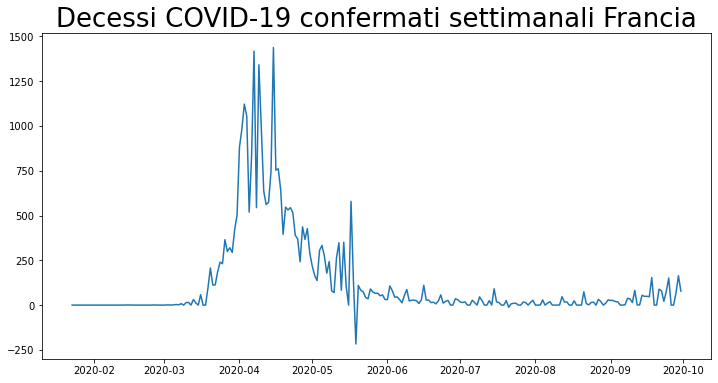

In [15]:
plt.figure(figsize=(12,6))
plt.title('Decessi COVID-19 confermati settimanali Francia', size=26)
plt.plot(ts_fr)
plt.show()

<h1>GERMANIA

In [16]:
df_ge = df[df['Geo'] == 'Germany']
df_ge.head()

,Date,Geo,Province/State,Value
42768,2020-01-22,Germany,NaN,0
42769,2020-01-23,Germany,NaN,0
42770,2020-01-24,Germany,NaN,0
42771,2020-01-25,Germany,NaN,0
42772,2020-01-26,Germany,NaN,0


In [17]:
df_ge = df_ge.groupby('Date').sum()
df_ge = df_ge.diff()
df_ge.dropna(inplace=True)
df_ge.head()

,Value
Date,
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
2020-01-27,0.0


In [18]:
df_ge = df_ge.reset_index()
df_ge.head()

,Date,Value
0,2020-01-23,0.0
1,2020-01-24,0.0
2,2020-01-25,0.0
3,2020-01-26,0.0
4,2020-01-27,0.0


<h4>Trasformo la serie storica su base settimanale

In [19]:
#df_ge['Date']= pd.to_datetime(df_ge['Date'])
#df_ge['week']= df_ge['Date'].dt.week
#df_ge['Date'] = df_ge['Date'].astype(str) + 'W' + df_ge['week'].astype(str)
#df_ge.drop(['week'], axis=1, inplace=True)
#df_ge.head()

In [20]:
#df_ge['Date'] = pd.to_datetime(df_ge['Date'] + '1', format='%Y-%m-%dW%W%w')
df_ge['Date'] = pd.to_datetime(df_ge['Date'])
df_ge = df_ge.groupby('Date').sum()
df_ge.head()

,Value
Date,
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
2020-01-27,0.0


In [21]:
print(df_ge.sum())

Value    9495.0
dtype: float64


In [22]:
df_ge = df_ge.reset_index()
df_ge = df_ge[df_ge['Date'] < '2020-10-01']
df_ge.head()

,Date,Value
0,2020-01-23,0.0
1,2020-01-24,0.0
2,2020-01-25,0.0
3,2020-01-26,0.0
4,2020-01-27,0.0


In [23]:
df_ge.to_csv('csv/decessi_covid/serie_storica_decessi_covid_ge.csv')

In [24]:
df_ge = df_ge.set_index('Date')
ts_ge = df_ge.Value
ts_ge.head()

Date
2020-01-23    0.0
2020-01-24    0.0
2020-01-25    0.0
2020-01-26    0.0
2020-01-27    0.0
Name: Value, dtype: float64

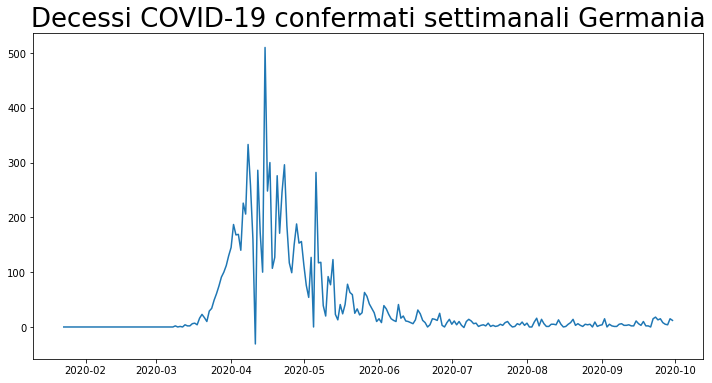

In [25]:
plt.figure(figsize=(12,6))
plt.title('Decessi COVID-19 confermati settimanali Germania', size=26)
plt.plot(ts_ge)
plt.show()

<h1>BELGIO

In [26]:
df_be = df[df['Geo'] == 'Belgium']
df_be.head()

,Date,Geo,Province/State,Value
7452,2020-01-22,Belgium,NaN,0
7453,2020-01-23,Belgium,NaN,0
7454,2020-01-24,Belgium,NaN,0
7455,2020-01-25,Belgium,NaN,0
7456,2020-01-26,Belgium,NaN,0


In [27]:
df_be = df_be.groupby('Date').sum()
df_be = df_be.diff()
df_be.dropna(inplace=True)
df_be.head()

,Value
Date,
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
2020-01-27,0.0


In [28]:
df_be = df_be.reset_index()
df_be.head()

,Date,Value
0,2020-01-23,0.0
1,2020-01-24,0.0
2,2020-01-25,0.0
3,2020-01-26,0.0
4,2020-01-27,0.0


<h4>Trasformo la serie storica su base settimanale

In [29]:
#df_be['Date']= pd.to_datetime(df_be['Date'])
#df_be['week']= df_be['Date'].dt.week
#df_be['Date'] = df_be['Date'].astype(str) + 'W' + df_be['week'].astype(str)
#df_be.drop(['week'], axis=1, inplace=True)
#df_be.head()

In [30]:
#df_be['Date'] = pd.to_datetime(df_be['Date'] + '1', format='%Y-%m-%dW%W%w')
df_be['Date'] = pd.to_datetime(df_be['Date'])
df_be = df_be.groupby('Date').sum()
df_be.head()

,Value
Date,
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
2020-01-27,0.0


In [31]:
print(df_be.sum())

Value    10016.0
dtype: float64


In [32]:
df_be = df_be.reset_index()
df_be = df_be[df_be['Date'] < '2020-10-01']
df_be.head()

,Date,Value
0,2020-01-23,0.0
1,2020-01-24,0.0
2,2020-01-25,0.0
3,2020-01-26,0.0
4,2020-01-27,0.0


In [33]:
df_be.to_csv('csv/decessi_covid/serie_storica_decessi_covid_be.csv')

In [34]:
df_be = df_be.set_index('Date')
ts_be = df_be.Value
ts_be.head()

Date
2020-01-23    0.0
2020-01-24    0.0
2020-01-25    0.0
2020-01-26    0.0
2020-01-27    0.0
Name: Value, dtype: float64

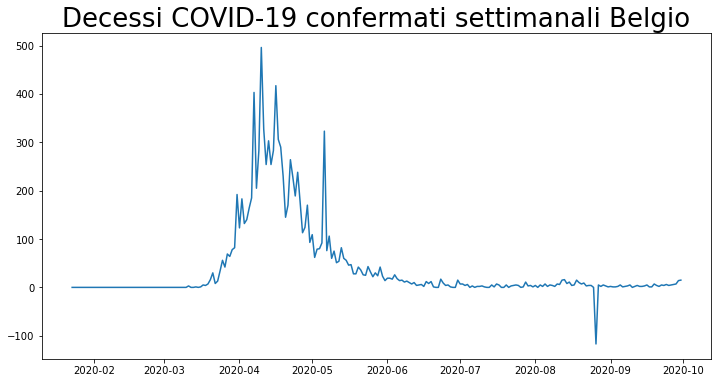

In [35]:
plt.figure(figsize=(12,6))
plt.title('Decessi COVID-19 confermati settimanali Belgio', size=26)
plt.plot(ts_be)
plt.show()

<h1>SPAGNA

In [36]:
df_sp = df[df['Geo'] == 'Spain']
df_sp.head()

,Date,Geo,Province/State,Value
74844,2020-01-22,Spain,NaN,0
74845,2020-01-23,Spain,NaN,0
74846,2020-01-24,Spain,NaN,0
74847,2020-01-25,Spain,NaN,0
74848,2020-01-26,Spain,NaN,0


In [37]:
df_sp = df_sp.groupby('Date').sum()
df_sp = df_sp.diff()
df_sp.dropna(inplace=True)
df_sp.head()

,Value
Date,
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
2020-01-27,0.0


In [38]:
df_sp = df_sp.reset_index()
df_sp.head()

,Date,Value
0,2020-01-23,0.0
1,2020-01-24,0.0
2,2020-01-25,0.0
3,2020-01-26,0.0
4,2020-01-27,0.0


<h4>Trasformo la serie storica su base settimanale

In [39]:
#df_sp['Date']= pd.to_datetime(df_sp['Date'])
#df_sp['week']= df_sp['Date'].dt.week
#df_sp['Date'] = df_sp['Date'].astype(str) + 'W' + df_sp['week'].astype(str)
#df_sp.drop(['week'], axis=1, inplace=True)
#df_sp.head()

In [40]:
#df_sp['Date'] = pd.to_datetime(df_sp['Date'] + '1', format='%Y-%m-%dW%W%w')
df_sp['Date'] = pd.to_datetime(df_sp['Date'])
df_sp = df_sp.groupby('Date').sum()
df_sp.head()

,Value
Date,
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
2020-01-27,0.0


In [41]:
print(df_sp.sum())

Value    31791.0
dtype: float64


In [42]:
df_sp = df_sp.reset_index()
df_sp = df_sp[df_sp['Date'] < '2020-10-01']
df_sp.head()

,Date,Value
0,2020-01-23,0.0
1,2020-01-24,0.0
2,2020-01-25,0.0
3,2020-01-26,0.0
4,2020-01-27,0.0


In [43]:
df_sp.to_csv('csv/decessi_covid/serie_storica_decessi_covid_sp.csv')

In [44]:
df_sp = df_sp.set_index('Date')
ts_sp = df_sp.Value
ts_sp.head()

Date
2020-01-23    0.0
2020-01-24    0.0
2020-01-25    0.0
2020-01-26    0.0
2020-01-27    0.0
Name: Value, dtype: float64

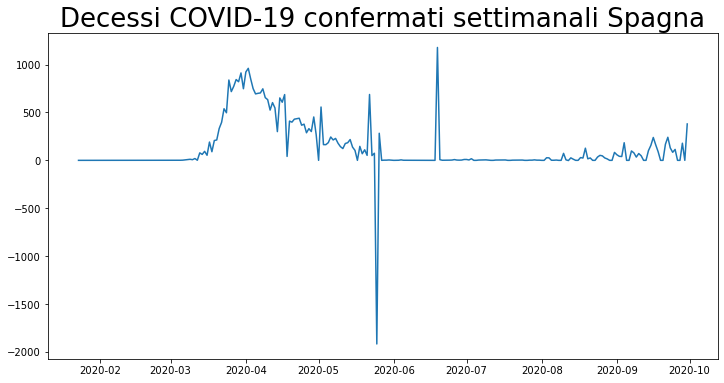

In [45]:
plt.figure(figsize=(12,6))
plt.title('Decessi COVID-19 confermati settimanali Spagna', size=26)
plt.plot(ts_sp)
plt.show()

<h1>REGNO UNITO

In [46]:
df_uk = df[df['Geo'] == 'United Kingdom']
df_uk.head()

,Date,Geo,Province/State,Value
81324,2020-01-22,United Kingdom,Anguilla,0
81325,2020-01-23,United Kingdom,Anguilla,0
81326,2020-01-24,United Kingdom,Anguilla,0
81327,2020-01-25,United Kingdom,Anguilla,0
81328,2020-01-26,United Kingdom,Anguilla,0


In [47]:
df_uk = df_uk.groupby('Date').sum()
df_uk = df_uk.diff()
df_uk.dropna(inplace=True)
df_uk.head()

,Value
Date,
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
2020-01-27,0.0


In [48]:
df_uk = df_uk.reset_index()
df_uk.head()

,Date,Value
0,2020-01-23,0.0
1,2020-01-24,0.0
2,2020-01-25,0.0
3,2020-01-26,0.0
4,2020-01-27,0.0


<h4>Trasformo la serie storica su base settimanale

In [49]:
#df_uk['Date']= pd.to_datetime(df_uk['Date'])
#df_uk['week']= df_uk['Date'].dt.week
#df_uk['Date'] = df_uk['Date'].astype(str) + 'W' + df_uk['week'].astype(str)
#df_uk.drop(['week'], axis=1, inplace=True)
#df_uk.head()

In [50]:
#df_uk['Date'] = pd.to_datetime(df_uk['Date'] + '1', format='%Y-%m-%dW%W%w')
df_uk['Date'] = pd.to_datetime(df_uk['Date'])
df_uk = df_uk.groupby('Date').sum()
df_uk.head()

,Value
Date,
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
2020-01-27,0.0


In [51]:
print(df_uk.sum())

Value    42233.0
dtype: float64


In [52]:
df_uk = df_uk.reset_index()
df_uk = df_uk[df_uk['Date'] < '2020-10-01']
df_uk.head()

,Date,Value
0,2020-01-23,0.0
1,2020-01-24,0.0
2,2020-01-25,0.0
3,2020-01-26,0.0
4,2020-01-27,0.0


In [53]:
df_uk.to_csv('csv/decessi_covid/serie_storica_decessi_covid_uk.csv')

In [54]:
df_uk = df_uk.set_index('Date')
ts_uk = df_uk.Value
ts_uk.head()

Date
2020-01-23    0.0
2020-01-24    0.0
2020-01-25    0.0
2020-01-26    0.0
2020-01-27    0.0
Name: Value, dtype: float64

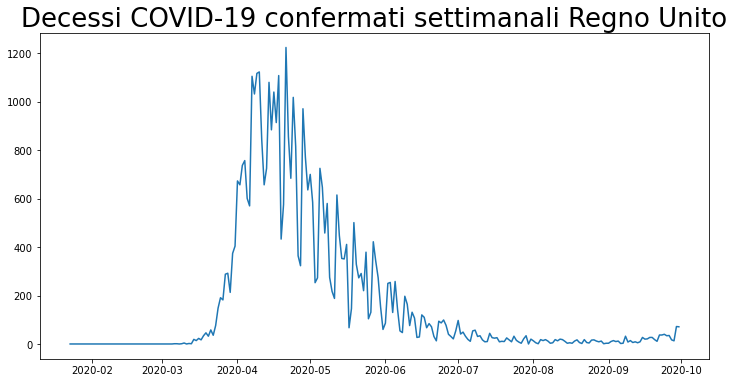

In [55]:
plt.figure(figsize=(12,6))
plt.title('Decessi COVID-19 confermati settimanali Regno Unito', size=26)
plt.plot(ts_uk)
plt.show()

<h1>PORTOGALLO

In [56]:
df_po = df[df['Geo'] == 'Portugal']
df_po.head()

,Date,Geo,Province/State,Value
67392,2020-01-22,Portugal,NaN,0
67393,2020-01-23,Portugal,NaN,0
67394,2020-01-24,Portugal,NaN,0
67395,2020-01-25,Portugal,NaN,0
67396,2020-01-26,Portugal,NaN,0


In [57]:
df_po = df_po.groupby('Date').sum()
df_po = df_po.diff()
df_po.dropna(inplace=True)
df_po.head()

,Value
Date,
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
2020-01-27,0.0


In [58]:
df_po = df_po.reset_index()
df_po.head()

,Date,Value
0,2020-01-23,0.0
1,2020-01-24,0.0
2,2020-01-25,0.0
3,2020-01-26,0.0
4,2020-01-27,0.0


<h4>Trasformo la serie storica su base settimanale

In [59]:
#df_po['Date']= pd.to_datetime(df_po['Date'])
#df_po['week']= df_po['Date'].dt.week
#df_po['Date'] = df_po['Date'].astype(str) + 'W' + df_po['week'].astype(str)
#df_po.drop(['week'], axis=1, inplace=True)
#df_po.head()

In [60]:
#df_po['Date'] = pd.to_datetime(df_po['Date'] + '1', format='%Y-%m-%dW%W%w')
df_po['Date'] = pd.to_datetime(df_po['Date'])
df_po = df_po.groupby('Date').sum()
df_po.head()

,Value
Date,
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
2020-01-27,0.0


In [61]:
print(df_po.sum())

Value    1971.0
dtype: float64


In [62]:
df_po = df_po.reset_index()
df_po = df_po[df_po['Date'] < '2020-10-01']
df_po.head()

,Date,Value
0,2020-01-23,0.0
1,2020-01-24,0.0
2,2020-01-25,0.0
3,2020-01-26,0.0
4,2020-01-27,0.0


In [63]:
df_po.to_csv('csv/decessi_covid/serie_storica_decessi_covid_po.csv')

In [64]:
df_po = df_po.set_index('Date')
ts_po = df_po.Value
ts_po.head()

Date
2020-01-23    0.0
2020-01-24    0.0
2020-01-25    0.0
2020-01-26    0.0
2020-01-27    0.0
Name: Value, dtype: float64

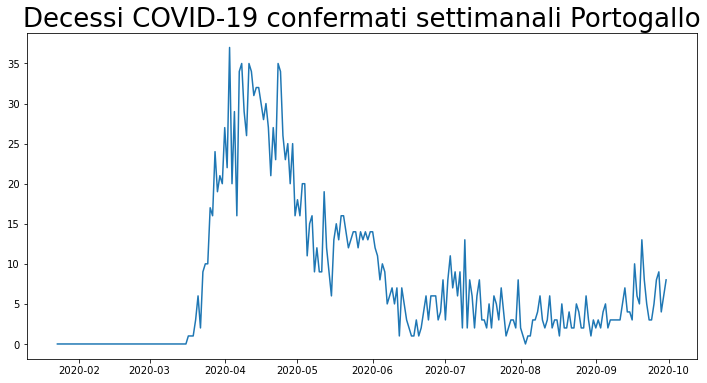

In [65]:
plt.figure(figsize=(12,6))
plt.title('Decessi COVID-19 confermati settimanali Portogallo', size=26)
plt.plot(ts_po)
plt.show()

<h1>GRECIA

In [66]:
df_gr = df[df['Geo'] == 'Greece']
df_gr.head()

,Date,Geo,Province/State,Value
43416,2020-01-22,Greece,NaN,0
43417,2020-01-23,Greece,NaN,0
43418,2020-01-24,Greece,NaN,0
43419,2020-01-25,Greece,NaN,0
43420,2020-01-26,Greece,NaN,0


In [67]:
df_gr = df_gr.groupby('Date').sum()
df_gr = df_gr.diff()
df_gr.dropna(inplace=True)
df_gr.head()

,Value
Date,
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
2020-01-27,0.0


In [68]:
df_gr = df_gr.reset_index()
df_gr.head()

,Date,Value
0,2020-01-23,0.0
1,2020-01-24,0.0
2,2020-01-25,0.0
3,2020-01-26,0.0
4,2020-01-27,0.0


<h4>Trasformo la serie storica su base settimanale

In [69]:
#df_gr['Date']= pd.to_datetime(df_gr['Date'])
#df_gr['week']= df_gr['Date'].dt.week
#df_gr['Date'] = df_gr['Date'].astype(str) + 'W' + df_gr['week'].astype(str)
#df_gr.drop(['week'], axis=1, inplace=True)
#df_gr.head()

In [70]:
#df_gr['Date'] = pd.to_datetime(df_gr['Date'] + '1', format='%Y-%m-%dW%W%w')
df_gr['Date'] = pd.to_datetime(df_gr['Date'])
df_gr = df_gr.groupby('Date').sum()
df_gr.head()

,Value
Date,
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
2020-01-27,0.0


In [71]:
print(df_gr.sum())

Value    391.0
dtype: float64


In [72]:
df_gr = df_gr.reset_index()
df_gr = df_gr[df_gr['Date'] < '2020-10-01']
df_gr.head()

,Date,Value
0,2020-01-23,0.0
1,2020-01-24,0.0
2,2020-01-25,0.0
3,2020-01-26,0.0
4,2020-01-27,0.0


In [73]:
df_gr.to_csv('csv/decessi_covid/serie_storica_decessi_covid_gr.csv')

In [74]:
df_gr = df_gr.set_index('Date')
ts_gr = df_gr.Value
ts_gr.head()

Date
2020-01-23    0.0
2020-01-24    0.0
2020-01-25    0.0
2020-01-26    0.0
2020-01-27    0.0
Name: Value, dtype: float64

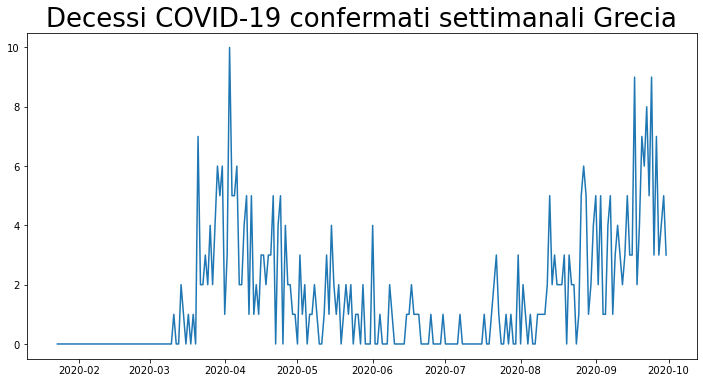

In [75]:
plt.figure(figsize=(12,6))
plt.title('Decessi COVID-19 confermati settimanali Grecia', size=26)
plt.plot(ts_gr)
plt.show()

<h1>ROMANIA

In [76]:
df_ro = df[df['Geo'] == 'Romania']
df_ro.head()

,Date,Geo,Province/State,Value
68040,2020-01-22,Romania,NaN,0
68041,2020-01-23,Romania,NaN,0
68042,2020-01-24,Romania,NaN,0
68043,2020-01-25,Romania,NaN,0
68044,2020-01-26,Romania,NaN,0


In [77]:
df_ro = df_ro.groupby('Date').sum()
df_ro = df_ro.diff()
df_ro.dropna(inplace=True)
df_ro.head()

,Value
Date,
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
2020-01-27,0.0


In [78]:
df_ro = df_ro.reset_index()
df_ro.head()

,Date,Value
0,2020-01-23,0.0
1,2020-01-24,0.0
2,2020-01-25,0.0
3,2020-01-26,0.0
4,2020-01-27,0.0


<h4>Trasformo la serie storica su base settimanale

In [79]:
#df_ro['Date']= pd.to_datetime(df_ro['Date'])
#df_ro['week']= df_ro['Date'].dt.week
#df_ro['Date'] = df_ro['Date'].astype(str) + 'W' + df_ro['week'].astype(str)
#df_ro.drop(['week'], axis=1, inplace=True)
#df_ro.head()

In [80]:
#df_ro['Date'] = pd.to_datetime(df_ro['Date'] + '1', format='%Y-%m-%dW%W%w')
df_ro['Date'] = pd.to_datetime(df_ro['Date'])
df_ro = df_ro.groupby('Date').sum()
df_ro.head()

,Value
Date,
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
2020-01-27,0.0


In [81]:
print(df_ro.sum())

Value    4825.0
dtype: float64


In [82]:
df_ro = df_ro.reset_index()
df_ro = df_ro[df_ro['Date'] < '2020-10-01']
df_ro.head()

,Date,Value
0,2020-01-23,0.0
1,2020-01-24,0.0
2,2020-01-25,0.0
3,2020-01-26,0.0
4,2020-01-27,0.0


In [83]:
df_ro.to_csv('csv/decessi_covid/serie_storica_decessi_covid_ro.csv')

In [84]:
df_ro = df_ro.set_index('Date')
ts_ro = df_ro.Value
ts_ro.head()

Date
2020-01-23    0.0
2020-01-24    0.0
2020-01-25    0.0
2020-01-26    0.0
2020-01-27    0.0
Name: Value, dtype: float64

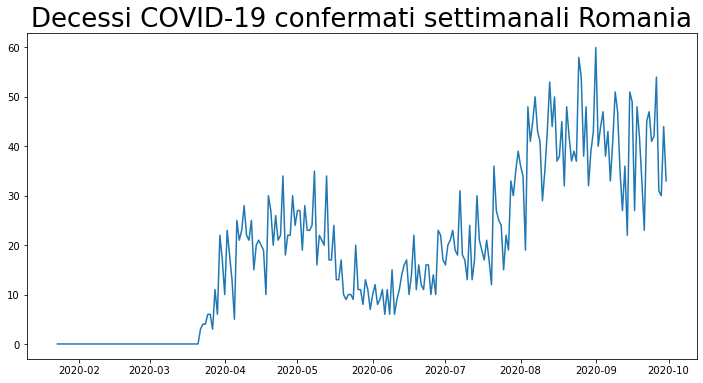

In [85]:
plt.figure(figsize=(12,6))
plt.title('Decessi COVID-19 confermati settimanali Romania', size=26)
plt.plot(ts_ro)
plt.show()